**Библиотеки Python для DS (семинары)**

Урок 2. Практическая работа с данными. Применение корреляционного анализа

Домашние задание:

Используя датасет «World Happiness Report 2019», изучите взаимосвязи между различными факторами, которые влияют на уровень счастья в разных странах.

Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

Вопросы для обсуждения:
Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?


***Проводим первичный анализ данных: изучаем типы переменных, наличие пропусков, статистические характеристики***

In [1]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
# Библиотеки коффециентов
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [2]:
df_report = pd.read_csv("sample_data/world_happiness_report_2019.csv")
df_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Этот фрейм данных содержит следующие столбцы:

Входные переменные (на основе физико-химических тестов):
1. Overall rank (Общий рейтинг)
2. Country or region (Страна или регион)
3. Score (Счёт/Оценка)
4. GDP per capita (ВВП на душу населения)
5. Social support (Социальная поддержка)
6. Healthy life expectancy (Продолжительность здоровой жизни)
7. Freedom to make life choices (Свобода выбора в жизни)
8. Generosity (Щедрость)
9. Perceptions of corruption (Восприятие корупции)


In [3]:
# Выводим общую информацию
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Из общей информации следует:
1. Всего 8 колонок
2. Нулевые значения отсуствуют
3. Нет пропущеных записей в колонках
4. Колонка 'Overall rank' имеет значение int64, колонка "Country or region" имеет object значения, остальные колонки имеют дробные значения float64

In [4]:
# Смотрим тип данных
df_report.dtypes

,0
Overall rank,int64
Country or region,object
Score,float64
GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64


In [5]:
df_report.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. Overall rank (Общий рейтинг):
- Средний общий рейтинг на уровне 78.50
- Миниманая 1.00
- Максимальная 156.00
- Медиана равна 78.50
- Отклонение состовляет 45.17
2. Score (Счёт/Оценка/счастья):
- Средние Счёт/Оценка, счастья на уровне 5.37
- Миниманая 2.85
- Максимальная 7.76
- Медиана равна 5.37
- Отклонение состовляет 5.40
3. GDP per capita (ВВП на душу населения):
- Средние значение ВВП на душу населения на уровне 0.96
- Миниманая 0.00
- Максимальная 1.,68
- Медиана равна 0.90
- Отклонение состовляет 0.39
4. Social support (Социальная поддержка):
- Средние социальной поддержки на уровне 1.27
- Миниманая 0.00
- Максимальная 1.62
- Медиана равна 1.20
- Отклонение состовляет 0.29
5. Healthy life expectancy (Продолжительность здоровой жизни):
- Средние значение продолжительность здоровой жизни на уровне 0.78
- Миниманая 0.00
- Максимальная 1.14
- Медиана равна 0.72
- Отклонение состовляет 0.24
6. Freedom to make life choices (Свобода выбора в жизни):
- Средние значение Свободы выбора в жизни на уровне 0.41
- Миниманая 0.00
- Максимальная 0.63
- Медиана равна 0.39
- Отклонение состовляет 0.14
7. Generosity (Щедрость):
- Средние значение щедрости на уровне 0.17
- Миниманая 0.00
- Максимальная 0.56
- Медиана равна 0.18
- Отклонение состовляет 0.09
8. Perceptions of corruption (Восприятие корупции):
- Средние значение Восприятие корупции на уровне 0.08
- Миниманая 0.00
- Максимальная 0.45
- Медиана равна 0.11
- Отклонение состовляет 0.09

In [6]:
df_report.describe(include='object').T

,count,unique,top,freq
Country or region,156,156,Finland,1


На основе представленных статистических данных объектных признаков можно сделать следующие выводы:
1. Country or region (Страна и регион)
Данная информация говорит нам о том, что всего имеется 156 стран и Финлянция находится среди них на первом месте.


***Задание 1:***

— Анализ корреляции между ВВП на душу населения и оценкой счастья

— Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья


Коэффициент корреляции Пирсона: 0.7938828678781275
P-значение: 4.315480913319406e-35


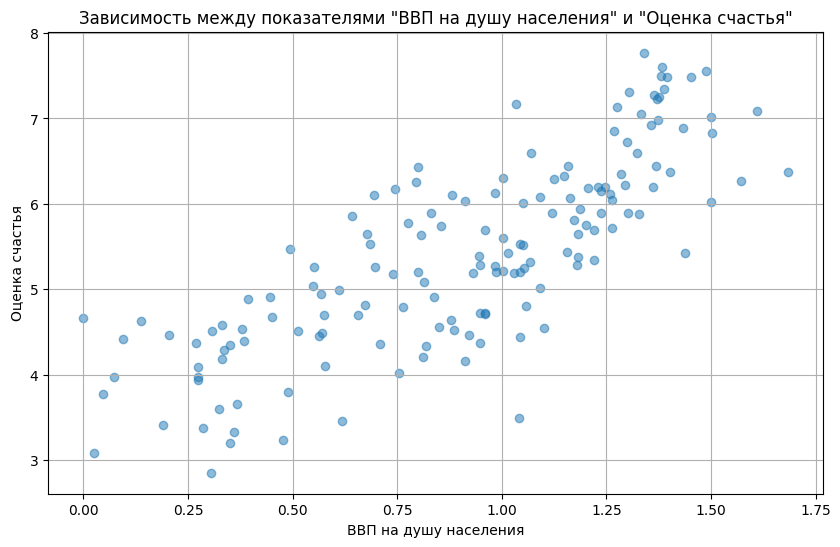

In [10]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df_report['GDP per capita'], df_report['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df_report['GDP per capita'], df_report['Score'], alpha=0.5)
plt.title('Зависимость между показателями "ВВП на душу населения" и "Оценка счастья"')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

1. Коэффициент коррекляции Пирсона равен 0.7938828678781273 это означает, что между ВВП населения и  оценкой счастья, есть сильная положительная связь. Из графика видно, что увеличение ВВП на душу населения приводит к повышению оценки счастья.
2. P-значение равно 4.315480913319774e-35, что меньше чем 0.05 подтверждая, что корреляция между ВВП на душу населения и счастья населения важна(значимая) и не является случайной.
3. Данные свидетельствуют о том, что ВВП на душу населения является значимым фактором, влияющим на оценку счастья. Чем выше уровень ВВП, тем выше, как правило, уровень счастья в стране.

***Задание 2:***

— Исследование влияния социальной поддержки на оценку счастья.

— Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.


In [11]:
# Вычисляем коэффициент корреляции Спирмена
coef, p = spearmanr(df_report['Social support'], df_report['Score'])
print(f"Коэффициент корреляции Спирмена: {coef}")
print(f"P-значение: {p}")

Коэффициент корреляции Спирмена: 0.8161807357057258
P-значение: 1.613098226311642e-38


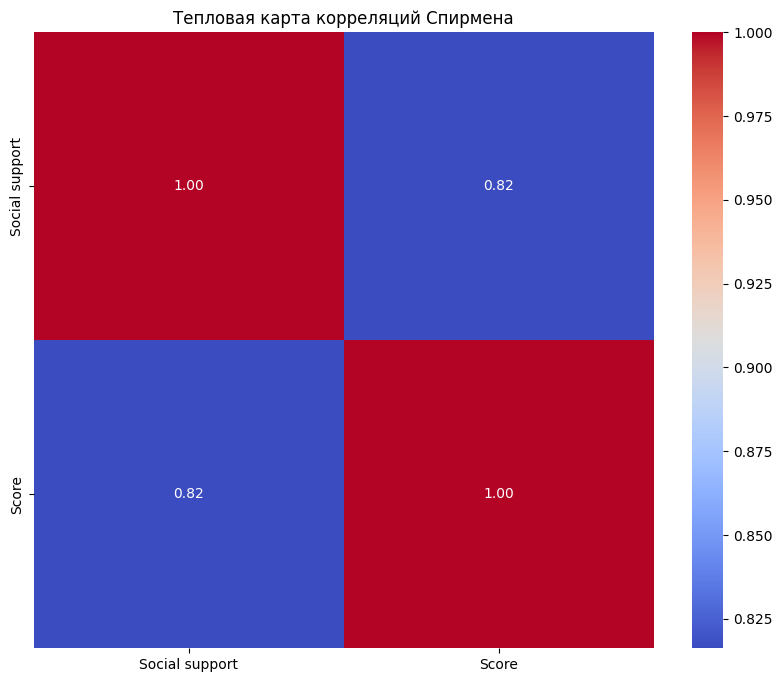

In [12]:
# Выборка количественных переменных
quantitative_vars = df_report[['Social support', 'Score']]
# Вычисляем матрицу корреляций Спирмена
correlation_matrix = quantitative_vars.corr(method='spearman')

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Спирмена')
plt.show()

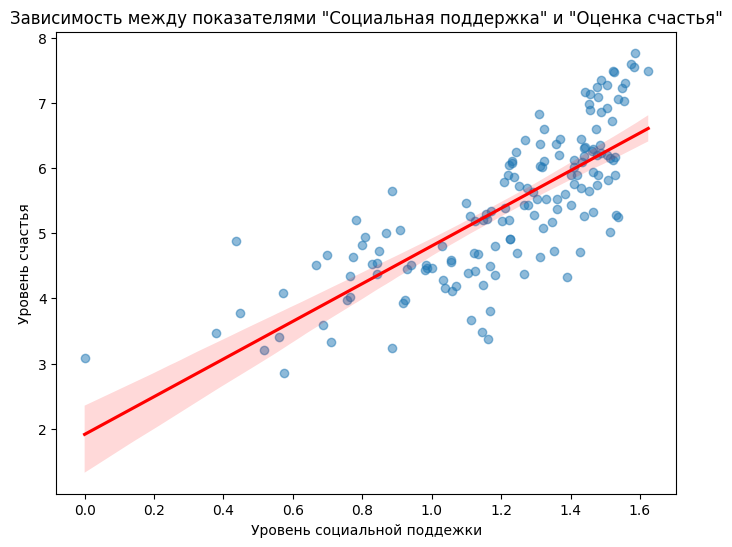

In [14]:
# График рассеивания с линией тренда для 'Social support' и 'Score'
plt.figure(figsize=(8, 6))
sns.regplot(x='Social support', y='Score', data=df_report, scatter_kws={'alpha': 0.5}, \
            line_kws={'color': 'red'})
plt.title('Зависимость между показателями "Социальная поддержка" и "Оценка счастья"')
plt.xlabel('Уровень социальной поддежки')
plt.ylabel('Уровень счастья')
plt.show()


1. Тепловая карта подтверждает сильную положительную корреляцию между социальной поддержкой и оценкой счастья.
2. График рассеивания показывает линейную зависимость между социальной поддержкой и оценкой счастья.
3. Коэффициент коррекляции Спирмена равен 0.8161807357057258 и близко к 1, это означает, что между социальной поддержкой и  оценкой счастья, есть сильная положительная связь.
4. P-значение равно 1.13098226311642e-38, что меньше чем 0.05 подтверждая, что корреляция между социальной поддержкой населения и счастья населения важна(значимая) и не является случайной.

***Задание 3:***

— Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.

— Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.


Коэффициент корреляции Кэнделла: 0.6026128531700047
P-значение: 8.000780684230196e-29


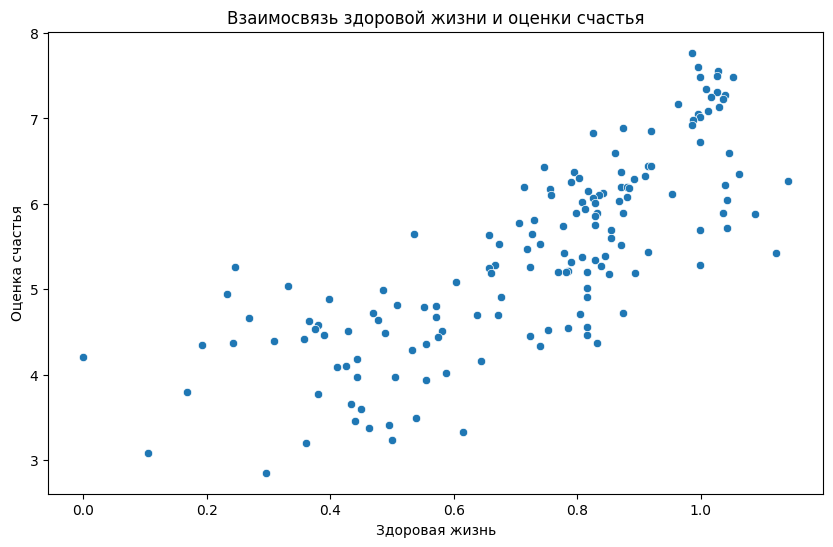

In [15]:
# Расчет коэффициента Кэнделла
tau, p_value = kendalltau(df_report["Healthy life expectancy"], df_report["Score"])
print(f"Коэффициент корреляции Кэнделла: {tau}")
print(f"P-значение: {p_value}")

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Healthy life expectancy", y="Score", data=df_report)
plt.title('Взаимосвязь здоровой жизни и оценки счастья')
plt.xlabel('Здоровая жизнь')
plt.ylabel('Оценка счастья')
plt.show()


1. Коэффициент коррекляции Кэнделла равен 0.6026128531700047 и указывает на умеренную положительную корреляцию между ожидаемой продолжительностью здоровой жизни и уровнем счастья.
2. P-значение равно 8.000780684230196e-29, что меньше чем 0.05 подтверждая, что в странах с высокой здоровой жизнью уровень счастья населения выше и не является случайным.

***Задание 4:***

— Свобода делать жизненный выбор и уровень счастья.

— Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.


Коэффициент корреляции Пирсона: 0.5667418257199902
P-значение: 1.23792436279821e-14


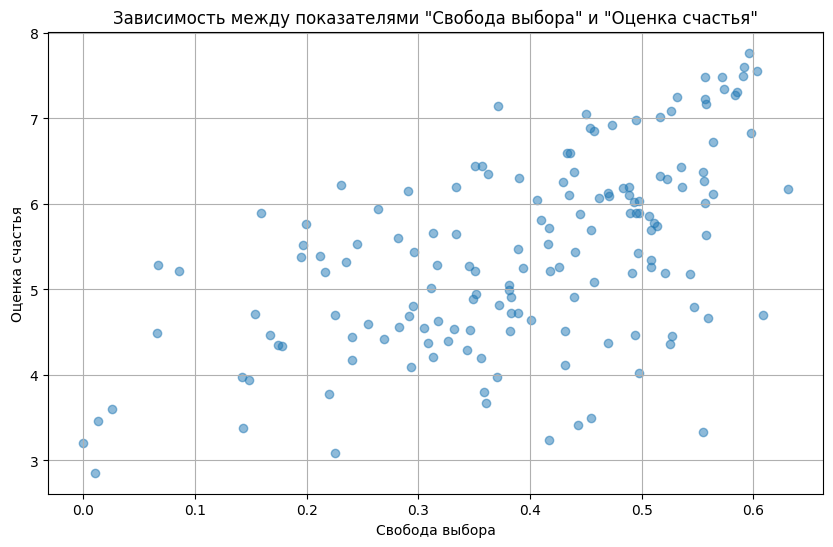

In [18]:
# Вычисляем коэффициент корреляции Пирсона
correlation_coefficient, p_value = stats.pearsonr(df_report['Freedom to make life choices'], df_report['Score'])
print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

# Построение графика рассеивания
plt.figure(figsize=(10, 6))
plt.scatter(df_report['Freedom to make life choices'], df_report['Score'], alpha=0.5)
plt.title('Зависимость между показателями "Свобода выбора" и "Оценка счастья"')
plt.xlabel('Свобода выбора')
plt.ylabel('Оценка счастья')
plt.grid(True)
plt.show()

1. Коэффициент коррекляции Кэнделла равен 0.56674182571999 и указывает на умеренную положительную корреляцию между правом свободы выбора и уровнем счастья.
2. P-значение равно 1.2379243627982083e-14, что меньше чем 0.05 подтверждая, что в странах с высокой свободой делать жизненый выбор уровень счастья населения выше и не является случайным.

***Вопросы для обсуждения:***

— Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах?

— В чем может заключаться причина такой взаимосвязи?

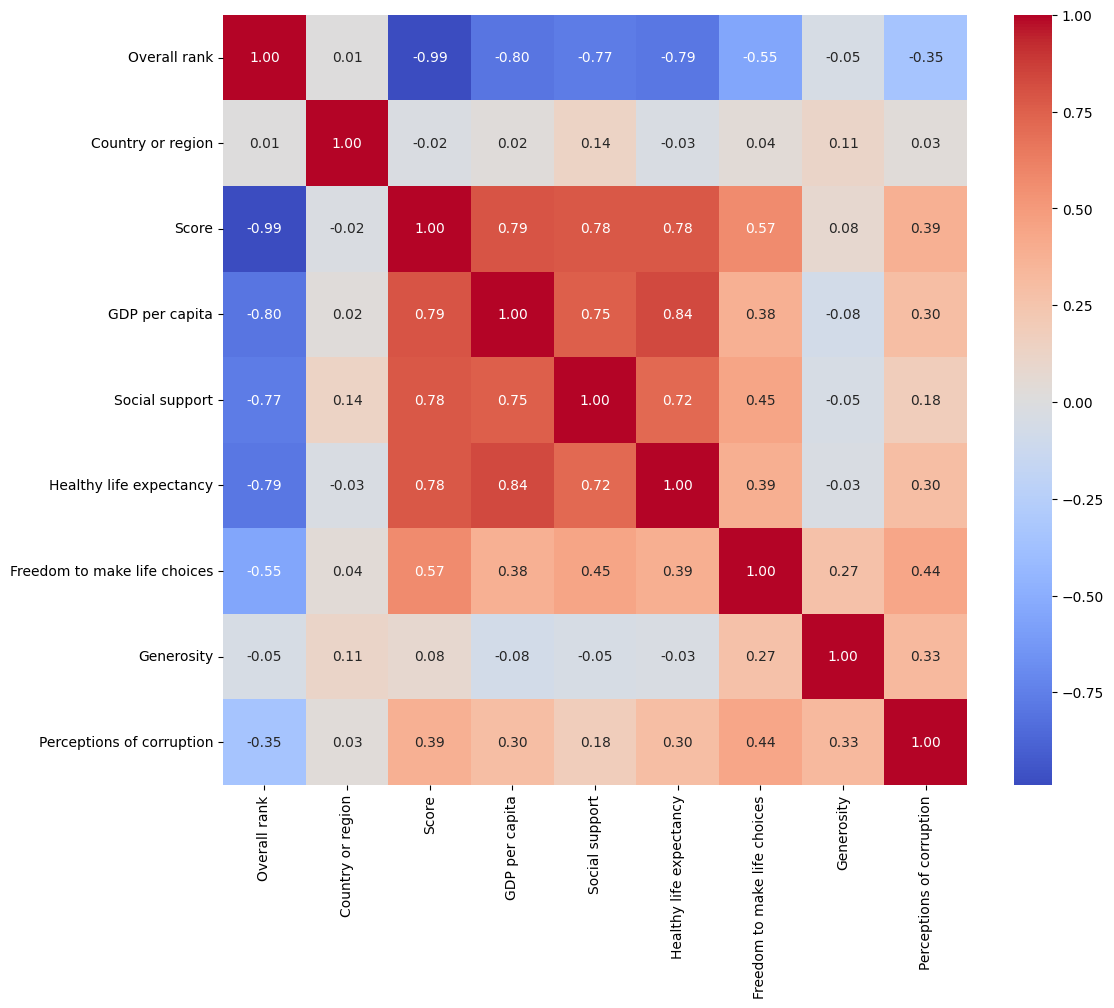

In [ ]:
# Сначала переведем категориальные переменные в числовой формат, если это необходимо
df_report['Country or region'] = df_report['Country or region'].astype('category').cat.codes

# Создание матрицы корреляции
corr_matrix = df_report.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Анализ графика говорит нам о том, что на уровень счастья людей конкретной страны сильное влияние оказывают такие факторы как ВВП страны на душу населения, уровень социальной поддержки населения, продолжительность жизни, право свободы выбора.

В странах с высоким уровнем ВВП на душу населения наблюдается более высокий уровень субъективного благополучия. Это подтверждается данными, которые указывают на линейную зависимость между уровнем дохода и уровнем счастья: рост дохода на душу населения сопровождается повышением уровня удовлетворённости жизнью.

Несмотря на то, что экономические факторы играют важную роль в определении уровня счастья, они не являются единственными. Социальные факторы, такие как доступ к образованию, здравоохранению и качественным общественным благам, также существенно влияют на субъективное благополучие.